In [1]:
#1.Importing libraries as pd

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating path
path = r'C:\Users\rbrand\12-28-2024 Instacart Basket Analysis'

In [3]:
# Defining the file path for combined_df.pkl
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'combined_df.pkl')

In [4]:
#Importing the ords_prods_merge dataframe from the pickle file
combined_df = pd.read_pickle(file_path)

In [5]:
combined_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_frequency_days,product_id,add_to_cart_order,reordered,_merge,...,Last Name,Gender,STATE,Age,income,Region,exclude_flag,customer_profile,n_dependants,fam_status
0,2398795,1,2,3,7,15.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
1,473747,1,3,3,12,21.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
2,2254736,1,4,4,7,29.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
3,431534,1,5,4,15,28.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
4,3367565,1,6,2,7,19.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married


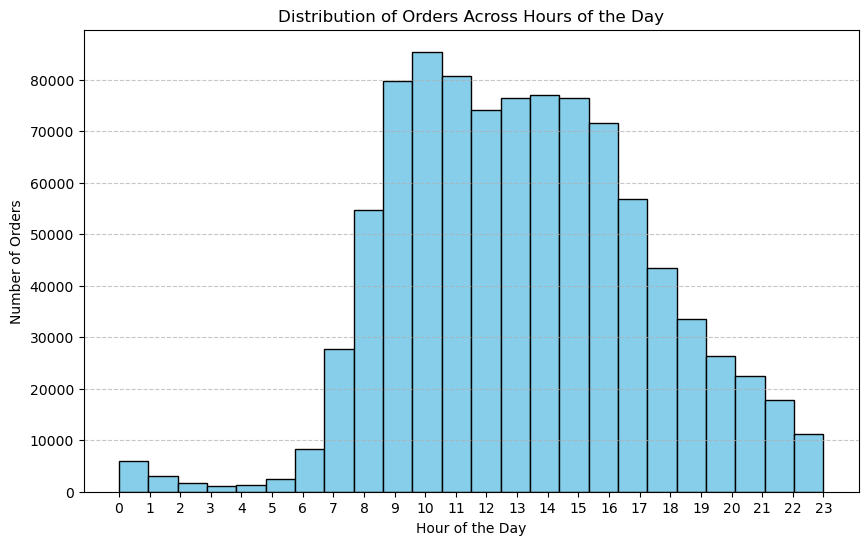

In [6]:
#3. Create a histogram of the "order_hour_of_day" column
plt.figure(figsize=(10, 6))
combined_df['order_hour_of_day'].plot.hist(bins=24, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histagram illustrates a repeating cycle of order trends throughout the day. Starting from the early hours, there's a gradual increase in orders, reaching a peak around 9-10 AM with over 80k orders. Following this, there's a slight decline until around 11 AM, and the pattern continues with a similar cycle until the end of the day. This cyclic trend suggests a consistent, repeating pattern of order activity. My efforts to enhance the chart's clarity aim to make these trends more visually accessible for better insights into daily order fluctuations.

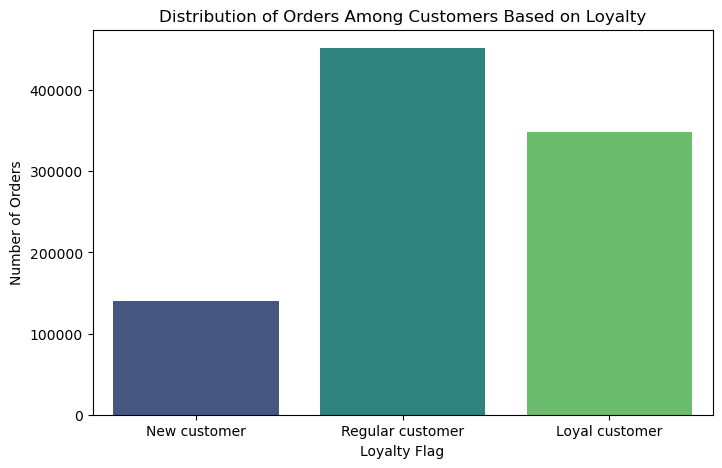

In [7]:
#4.# Creating a bar chart for the distribution of orders among customers based on loyalty
plt.figure(figsize=(8, 5))
sns.countplot(x='loyalty_flag', data=combined_df, palette='viridis')
plt.title('Distribution of Orders Among Customers Based on Loyalty')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Orders')
plt.show()

The bar chart provides insights into how different types of customers contribute to orders. Regular customers stand out as the largest group, showing they order the most frequently. Loyal customers follow, indicating a good level of commitment, while new customers also make a noticeable impact. This tells us that keeping existing customers engaged is crucial, and Instacart is successfully attracting new ones too.

In [8]:
#5.# Creating a sample for accurate representation
sample_df = combined_df.sample(n=1000, random_state=42)


C:\Users\rbrand\AppData\Local\Temp\ipykernel_5316\479203592.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='order_hour_of_day', y='prices', data=sample_df, ci=None)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


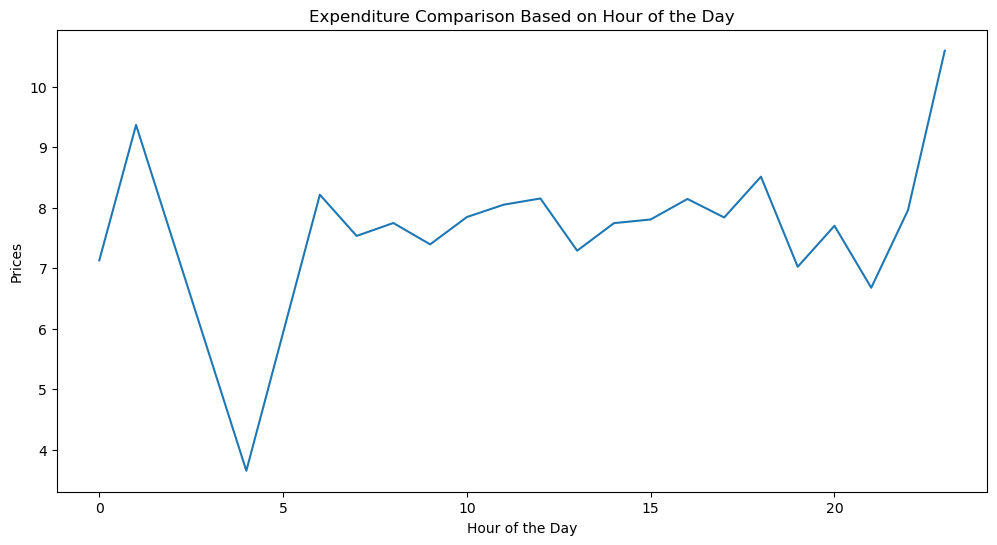

In [9]:
#Creating a line chart to compare expenditure based on the hour of the day
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_hour_of_day', y='prices', data=sample_df, ci=None)
plt.title('Expenditure Comparison Based on Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Prices')
plt.show()

The line chart reveals interesting patterns in expenditure based on the hour of the day. It starts with a noticeable spike around hours 2-3, reaching prices as high as 9. However, this peak is short-lived as expenditure drastically declines to 2-3 around hour 4.5. Following this dip, there is a gradual recovery, stabilizing at around price 8 from hour 6 to 22-23. The most striking observation occurs towards the end of the day, where there's a significant spike in expenditure.

This pattern suggests varying spending behaviors throughout the day, with distinct peaks and troughs. Understanding these trends assist Instacart in tailoring strategies to maximize engagement and cater to different spending preferences across different hours per the request.

In [10]:
# Display the column names in the combined_df dataframe
combined_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'order_frequency_days', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', 'merge_flag',
       'price_range_loc', 'busiest_day', 'new_busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'Last Name', 'Gender', 'STATE', 'Age', 'income',
       'Region', 'exclude_flag', 'customer_profile', 'n_dependants',
       'fam_status'],
      dtype='object')

In [11]:
#6.Importing customers.csv data set from original data.
df_cust = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [12]:
df_cust.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [13]:
# Identify missing fields
missing_fields = ['n_dependants', 'fam_status']

In [14]:
# Merge dataframes using a common identifier (e.g., user_id)
combined_df = pd.merge(combined_df, df_cust[['user_id', 'n_dependants', 'fam_status']], on='user_id', how='left')

In [15]:
combined_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_frequency_days,product_id,add_to_cart_order,reordered,_merge,...,STATE,Age,income,Region,exclude_flag,customer_profile,n_dependants_x,fam_status_x,n_dependants_y,fam_status_y
0,2398795,1,2,3,7,15.0,196,1,1,both,...,Alabama,31,40423,South,Include,Other,3,married,3,married
1,473747,1,3,3,12,21.0,196,1,1,both,...,Alabama,31,40423,South,Include,Other,3,married,3,married
2,2254736,1,4,4,7,29.0,196,1,1,both,...,Alabama,31,40423,South,Include,Other,3,married,3,married
3,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,40423,South,Include,Other,3,married,3,married
4,3367565,1,6,2,7,19.0,196,1,1,both,...,Alabama,31,40423,South,Include,Other,3,married,3,married


In [16]:
# Check for missing values in the combined DataFrame
missing_values = combined_df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

order_id                 0
user_id                  0
order_number             0
orders_day_of_week       0
order_hour_of_day        0
order_frequency_days     0
product_id               0
add_to_cart_order        0
reordered                0
_merge                   0
Unnamed: 0_y             0
product_name             0
aisle_id                 0
department_id            0
prices                   0
merge_flag               0
price_range_loc          0
busiest_day              0
new_busiest_days         0
busiest_period_of_day    0
max_order                0
loyalty_flag             0
spending_flag            0
order_frequency_flag     0
Last Name                0
Gender                   0
STATE                    0
Age                      0
income                   0
Region                   0
exclude_flag             0
customer_profile         0
n_dependants_x           0
fam_status_x             0
n_dependants_y           0
fam_status_y             0
dtype: int64


In [17]:
# Creating a line chart to explore the connection between age and number of dependents
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='n_dependants', data=combined_df, ci=None)
plt.title('Connection Between Age and Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.show()

C:\Users\rbrand\AppData\Local\Temp\ipykernel_5316\3219891052.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='n_dependants', data=combined_df, ci=None)


ValueError: Could not interpret value `n_dependants` for parameter `y`

<Figure size 1200x600 with 0 Axes>

The line chart illustrates the relationship between age and the number of dependents per the request. From the age of 20 to 40, there is a general fluctuation in the number of dependents, with a peak around 1.60 at the age of 25, followed by a decline to approximately 1.45. The age range of 40 to 50 experiences a decrease in the number of dependents to around 1.40, and from 50 onward, there are fluctuations, including a significant spike at around age 70, followed by a decrease at age 80.

These fluctuations suggest that certain age groups may have different patterns in terms of the number of dependents. The spike at age 70 might indicate a specific demographic with a higher number of dependents.

Note: In the process, I retrieved the dropped data from the combined dataframe by merging it with the original customer data. This allowed me to analyze the relationship between age and the number of dependents comprehensively.

In [ ]:
# Creating a scatterplot to explore the connection between age and income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='income', data=combined_df)
plt.title('Connection Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

The scatterplot and correlation tell us that, on average, as people get older, they tend to have higher incomes. However, it's important to know that this relationship isn't super strong. The scatterplot shows a general trend of older people having higher incomes, but there's also some variation, meaning not everyone fits this pattern exactly. The average age in the data is about 49 years. Overall, age and income seem to go up together, but it's not a perfect rule.

#8. Exporting the visualizations ---------------------------------------------------------------

In [22]:
#Errors given 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hour_of_day.png'))

<Figure size 640x480 with 0 Axes>

In [23]:
plt.show()

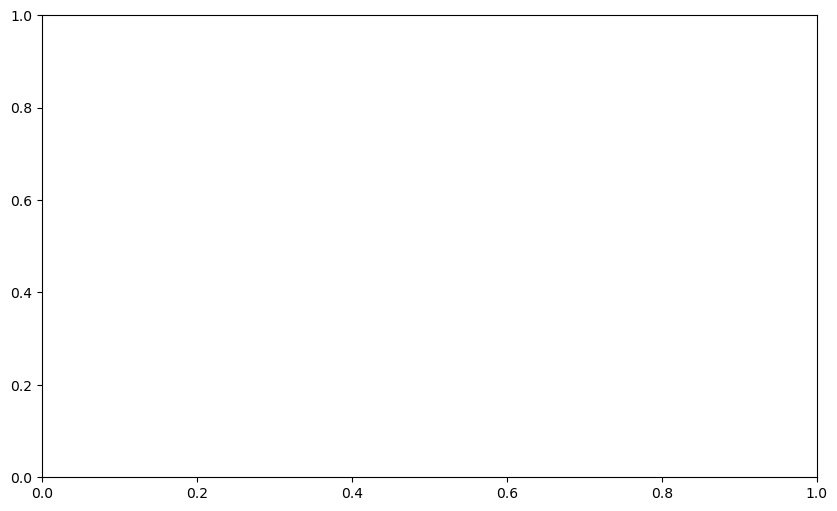

In [24]:
#Reworking the files with creating the figure objetc.
fig, ax = plt.subplots(figsize=(10, 6))

In [25]:
#THen creating my histogram code
combined_df['order_hour_of_day'].plot.hist(bins=24, color='skyblue', edgecolor='black', ax=ax)
ax.set_title('Distribution of Orders Across Hours of the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders')
ax.set_xticks(range(24))
ax.grid(axis='y', linestyle='--', alpha=0.7)

In [27]:
#Saving the figure
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hour_of_day.png'))

In [28]:
#Displaying the plot - Saved succesfully
plt.show()

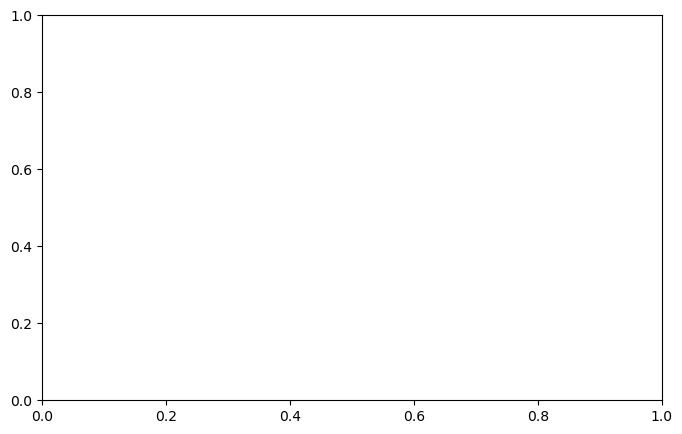

In [32]:
# Same process with the bar chart - Creating a Figure object
fig, ax = plt.subplots(figsize=(8, 5))

In [33]:
#bar chart code
sns.countplot(x='loyalty_flag', data=combined_df, palette='viridis', ax=ax)
ax.set_title('Distribution of Orders Among Customers Based on Loyalty')
ax.set_xlabel('Loyalty Flag')
ax.set_ylabel('Number of Orders')

Text(4.444444444444445, 0.5, 'Number of Orders')

In [34]:
# Saving the figure
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_loyalty_distribution.png'))

# Display the plot
plt.show()

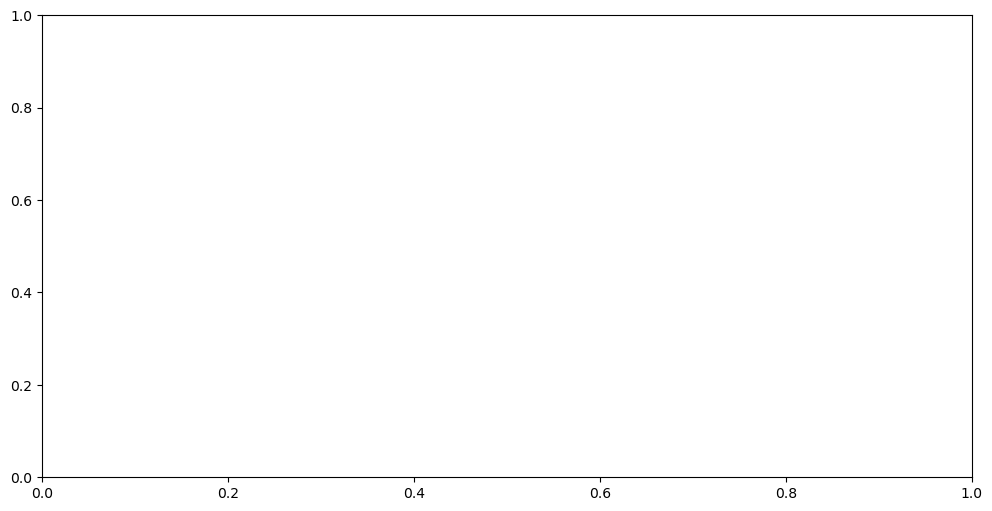

In [35]:
# Create a Figure object for line chart
fig, ax = plt.subplots(figsize=(12, 6))

In [36]:
# line chart code
sns.lineplot(x='order_hour_of_day', y='prices', data=sample_df, ci=None, ax=ax)
ax.set_title('Expenditure Comparison Based on Hour of the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Prices')

C:\Users\rbrand\AppData\Local\Temp\ipykernel_20572\3306405513.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='order_hour_of_day', y='prices', data=sample_df, ci=None, ax=ax)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(4.444444444444452, 0.5, 'Prices')

In [37]:
# Save the figure
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_expenditure_comparison.png'))

# Display the plot
plt.show()

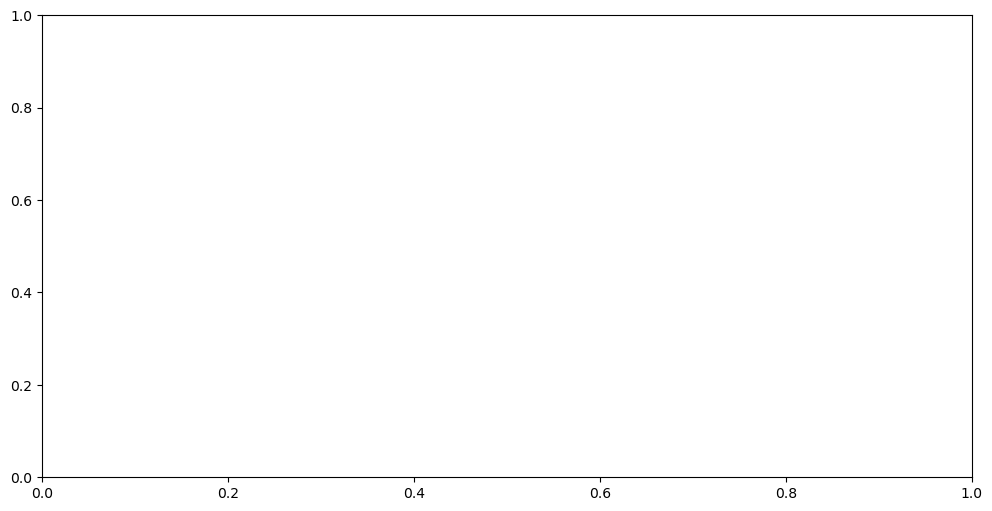

In [38]:
# Creating a Figure object
fig, ax = plt.subplots(figsize=(12, 6))

In [39]:
# line chart code
sns.lineplot(x='Age', y='n_dependants', data=combined_df, ci=None, ax=ax)
ax.set_title('Connection Between Age and Number of Dependents')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Dependents')

C:\Users\rbrand\AppData\Local\Temp\ipykernel_20572\1161957526.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='n_dependants', data=combined_df, ci=None, ax=ax)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(4.444444444444452, 0.5, 'Number of Dependents')

In [40]:
# Save the figure
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_age_dependents_connection.png'))

# Display the plot
plt.show()

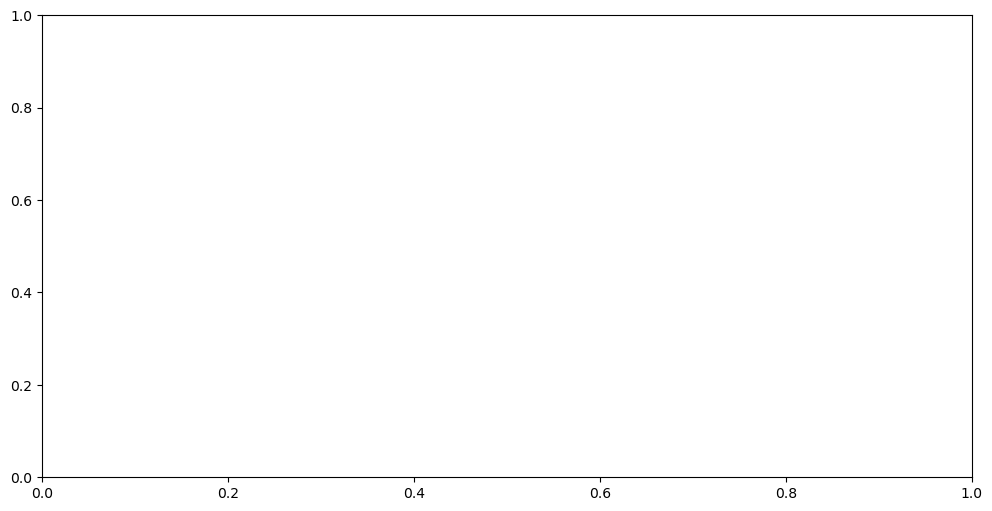

In [41]:
#Last one for the scatterplot - Creating a Figure object
fig, ax = plt.subplots(figsize=(12, 6))

In [42]:
#scatter plot code
sns.scatterplot(x='Age', y='income', data=combined_df, ax=ax)
ax.set_title('Connection Between Age and Income')
ax.set_xlabel('Age')
ax.set_ylabel('Income')

Text(4.444444444444452, 0.5, 'Income')

In [43]:
# Saving the figure
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_plot_age_income_connection.png'))

In [44]:
#Displaying the plot
plt.show()